# **Assignment 3**
Note: CSV file must be uploaded everytime to run the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import re
from bs4 import BeautifulSoup
from textblob import TextBlob

I chose the location to be remote since it had the most postings of all the locations I checked, and 'Data Scientist' as the role since that's the one I'm interested in working as after graduating.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving webscraping_results_assignmnet3.csv to webscraping_results_assignmnet3.csv


## **Webscraping**

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import FirefoxOptions

from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

driver_path = "C:/Users/hadis/Downloads/geckodriver.exe"
firefox_binary_path = "C:/Program Files/Mozilla Firefox/firefox.exe"

service = Service(executable_path=driver_path)
options = Options()
firefox_binary = FirefoxBinary(firefox_binary_path)
options.binary = firefox_binary
driver = webdriver.Firefox(service=service, options=options)

## Enter a job position
position = 'data scientist'
## Enter a location (City, State or Zip or remote)
locations = "remote"

def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position, location)
    return url

url = get_url(position, locations)
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])

## Number of postings to scrape
postings = 1200

jn = 0
for i in range(0, postings, 10):
    driver.get(url + "&start=" + str(i))
    driver.implicitly_wait(3)

    jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

    for job in jobs:
        result_html = job.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html, 'html.parser')

        jn += 1

        liens = job.find_elements(By.TAG_NAME, "a")
        links = liens[0].get_attribute("href")


        title = soup.select('.jobTitle')[0].get_text().strip()
        company_list = soup.select('.companyName')
        if company_list:
            company = company_list[0].get_text().strip()
        else:
            company = 'NaN'
        location = soup.select('.companyLocation')[0].get_text().strip()


        try:
            salary = soup.select('.salary-snippet-container')[0].get_text().strip()
        except:
            salary = 'NaN'
        try:
            rating = soup.select('.ratingNumber')[0].get_text().strip()
        except:
            rating = 'NaN'
        try:
            date = soup.select('.date')[0].get_text().strip()
        except:
            date = 'NaN'
        try:
            description = soup.select('.job-snippet')[0].get_text().strip()
        except:
            description = ''

        dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                                         "Company": company,
                                                         'Location': location,
                                                         'Rating': rating,
                                                         'Date': date,
                                                         "Salary": salary,
                                                         "Description": description,
                                                         "Links": links}])], ignore_index=True)
        print("Job number {0:4d} added - {1:s}".format(jn, title))

        # Convert the dataframe to a csv file
        date = datetime.today().strftime('%Y-%m-%d')
        dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

## **1. [1 pt] Data collection and cleaning:**

In [ ]:
df = pd.read_csv('webscraping_results_assignmnet3.csv',encoding= 'latin_1')
df

,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Data Scientist I,Vibrant Emotional Health,Remote,2.8,PostedPosted 1 day ago,NaN,Create data visualization dashboards to presen...,https://www.indeed.com/rc/clk?jk=7b2ea7b846fa2...
1,Associate Data Scientist - Rotational Program,Mutual of Omaha,Remote,3.7,PostedPosted 4 days ago,"$72,000 - $114,000 a year",The program lets the associate data scientists...,https://www.indeed.com/rc/clk?jk=20c8f542b3f17...
2,Jr. Data Scientist,Net2Aspire,Remote,NaN,EmployerActive 2 days ago,"$65,000 - $80,000 a year",ï· Create data dashboards and other data visu...,https://www.indeed.com/company/net2aspire/jobs...
3,Junior Data Scientist,New Directions Staffing,Remote,3.2,PostedPosted 3 days ago,"$88,000 - $115,000 a year","A background in health care, healthcare insura...",https://www.indeed.com/company/New-Directions-...
4,Data Analyst,DigiSure Insurance Solutions Inc.,Remote,NaN,PostedToday,"$85,000 - $100,000 a year",Experience with data analytics and visualizati...,https://www.indeed.com/rc/clk?jk=72559acfa2718...
...,...,...,...,...,...,...,...,...
1791,"Senior Director, Clinical Data & Information S...",Astellas,"Remote in Northbrook, IL 60062",3.7,PostedPosted 30+ days ago,NaN,10-15 years of healthcare industry experience ...,https://www.indeed.com/rc/clk?jk=cc561234f24d9...
1792,Senior Data Scientist,Maven Wave,"Remote in Chicago, IL",NaN,PostedPosted 30+ days ago,NaN,"Experience using Data Science languages (R, Py...",https://www.indeed.com/rc/clk?jk=f107af6d0b923...
1793,Statistical Programmer,Talentech Consulting LLC,Remote,NaN,EmployerActive 3 days ago,NaN,"Support statistical analyses, clinical study r...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1794,Senior Financial Data Analyst,Malwarebytes,Remote,3.8,PostedPosted 30+ days ago,NaN,"SQL skills to consume, conform, and curate lar...",https://www.indeed.com/rc/clk?jk=bffa79fb91e19...


Since job postings can have the same title, company, location, etc but can still be different, we will check for postings that have both the same description and link. For some reason some links of the entries take us to the general page of the indeed search not to the specifc job posting page, so we cannot depend on links alone. Thus we will assume that if postings are found with the same description and link, then they must be duplicates.

In [ ]:
# drop duplicates
df.drop_duplicates(subset=['Links', 'Description'])
df

,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Data Scientist I,Vibrant Emotional Health,Remote,2.8,PostedPosted 1 day ago,NaN,Create data visualization dashboards to presen...,https://www.indeed.com/rc/clk?jk=7b2ea7b846fa2...
1,Associate Data Scientist - Rotational Program,Mutual of Omaha,Remote,3.7,PostedPosted 4 days ago,"$72,000 - $114,000 a year",The program lets the associate data scientists...,https://www.indeed.com/rc/clk?jk=20c8f542b3f17...
2,Jr. Data Scientist,Net2Aspire,Remote,NaN,EmployerActive 2 days ago,"$65,000 - $80,000 a year",ï· Create data dashboards and other data visu...,https://www.indeed.com/company/net2aspire/jobs...
3,Junior Data Scientist,New Directions Staffing,Remote,3.2,PostedPosted 3 days ago,"$88,000 - $115,000 a year","A background in health care, healthcare insura...",https://www.indeed.com/company/New-Directions-...
4,Data Analyst,DigiSure Insurance Solutions Inc.,Remote,NaN,PostedToday,"$85,000 - $100,000 a year",Experience with data analytics and visualizati...,https://www.indeed.com/rc/clk?jk=72559acfa2718...
...,...,...,...,...,...,...,...,...
1791,"Senior Director, Clinical Data & Information S...",Astellas,"Remote in Northbrook, IL 60062",3.7,PostedPosted 30+ days ago,NaN,10-15 years of healthcare industry experience ...,https://www.indeed.com/rc/clk?jk=cc561234f24d9...
1792,Senior Data Scientist,Maven Wave,"Remote in Chicago, IL",NaN,PostedPosted 30+ days ago,NaN,"Experience using Data Science languages (R, Py...",https://www.indeed.com/rc/clk?jk=f107af6d0b923...
1793,Statistical Programmer,Talentech Consulting LLC,Remote,NaN,EmployerActive 3 days ago,NaN,"Support statistical analyses, clinical study r...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1794,Senior Financial Data Analyst,Malwarebytes,Remote,3.8,PostedPosted 30+ days ago,NaN,"SQL skills to consume, conform, and curate lar...",https://www.indeed.com/rc/clk?jk=bffa79fb91e19...


Apparently all postings are unique. Going to drop the Links column now as it does not serve any further purpose to our analysis.

In [ ]:
df=df.drop('Links',axis=1)
df=df.reset_index()
df=df.drop('index',axis=1)

In [ ]:
df

,Title,Company,Location,Rating,Date,Salary,Description
0,Data Scientist I,Vibrant Emotional Health,Remote,2.8,PostedPosted 1 day ago,NaN,Create data visualization dashboards to presen...
1,Associate Data Scientist - Rotational Program,Mutual of Omaha,Remote,3.7,PostedPosted 4 days ago,"$72,000 - $114,000 a year",The program lets the associate data scientists...
2,Jr. Data Scientist,Net2Aspire,Remote,NaN,EmployerActive 2 days ago,"$65,000 - $80,000 a year",ï· Create data dashboards and other data visu...
3,Junior Data Scientist,New Directions Staffing,Remote,3.2,PostedPosted 3 days ago,"$88,000 - $115,000 a year","A background in health care, healthcare insura..."
4,Data Analyst,DigiSure Insurance Solutions Inc.,Remote,NaN,PostedToday,"$85,000 - $100,000 a year",Experience with data analytics and visualizati...
...,...,...,...,...,...,...,...
1791,"Senior Director, Clinical Data & Information S...",Astellas,"Remote in Northbrook, IL 60062",3.7,PostedPosted 30+ days ago,NaN,10-15 years of healthcare industry experience ...
1792,Senior Data Scientist,Maven Wave,"Remote in Chicago, IL",NaN,PostedPosted 30+ days ago,NaN,"Experience using Data Science languages (R, Py..."
1793,Statistical Programmer,Talentech Consulting LLC,Remote,NaN,EmployerActive 3 days ago,NaN,"Support statistical analyses, clinical study r..."
1794,Senior Financial Data Analyst,Malwarebytes,Remote,3.8,PostedPosted 30+ days ago,NaN,"SQL skills to consume, conform, and curate lar..."


In [ ]:
df.isnull().sum(axis=0)

Title             0
Company           0
Location          0
Rating          651
Date              0
Salary         1065
Description       0
dtype: int64

We are have 1796 unique job postings with the necessary features of job title, location, company name, job description, and salary all included.

In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_job_description(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove URLs
    text = re.sub(r"http\S+", "", text)

    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove numerical data
    text = re.sub(r'\d+', '', text)

    # Remove non-English text
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Correct spelling and grammatical errors
    text = str(TextBlob(text).correct())

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['Description_cleaned'] = df['Description'].apply(clean_job_description)

<ipython-input-13-5820aa19f583>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
# forgot to lower case 
df['Description_cleaned'] = df['Description_cleaned'].str.lower()

In [ ]:
df

,Title,Company,Location,Rating,Date,Salary,Description,Description_cleaned
0,Data Scientist I,Vibrant Emotional Health,Remote,2.8,PostedPosted 1 day ago,NaN,Create data visualization dashboards to presen...,create data visualization dashboard present fi...
1,Associate Data Scientist - Rotational Program,Mutual of Omaha,Remote,3.7,PostedPosted 4 days ago,"$72,000 - $114,000 a year",The program lets the associate data scientists...,program let associate data scientist rotate di...
2,Jr. Data Scientist,Net2Aspire,Remote,NaN,EmployerActive 2 days ago,"$65,000 - $80,000 a year",ï· Create data dashboards and other data visu...,create data dashboard data visualization tool...
3,Junior Data Scientist,New Directions Staffing,Remote,3.2,PostedPosted 3 days ago,"$88,000 - $115,000 a year","A background in health care, healthcare insura...",background health care healthcare insurance cl...
4,Data Analyst,DigiSure Insurance Solutions Inc.,Remote,NaN,PostedToday,"$85,000 - $100,000 a year",Experience with data analytics and visualizati...,experience data analysis visualization tool ro...
...,...,...,...,...,...,...,...,...
1791,"Senior Director, Clinical Data & Information S...",Astellas,"Remote in Northbrook, IL 60062",3.7,PostedPosted 30+ days ago,NaN,10-15 years of healthcare industry experience ...,year healthcare industry experience significa...
1792,Senior Data Scientist,Maven Wave,"Remote in Chicago, IL",NaN,PostedPosted 30+ days ago,NaN,"Experience using Data Science languages (R, Py...",experience using data science language r pytho...
1793,Statistical Programmer,Talentech Consulting LLC,Remote,NaN,EmployerActive 3 days ago,NaN,"Support statistical analyses, clinical study r...",support statistical analysis clinical study re...
1794,Senior Financial Data Analyst,Malwarebytes,Remote,3.8,PostedPosted 30+ days ago,NaN,"SQL skills to consume, conform, and curate lar...",sql skill consume conform curate large data se...


## **2. [3 pts] Exploratory data analysis and feature engineering:**

In [17]:
from collections import Counter
# words to exclude
exclude_words = ['and', 'of', 'to','the','a','in','on','with','from','for','this','or','as','will','is','be','an']

all_words = []

for text in df['Description_cleaned']:
    words = text.lower().split()
    # append each word to the 'all_words' list if it is not in the exclude list
    all_words.extend([word for word in words if word not in exclude_words])

# count
word_counts = Counter(all_words)

# get the 50 most common words
top_words = word_counts.most_common(100)

# results
print(top_words)

[('data', 1883), ('experience', 825), ('analysis', 637), ('learning', 494), ('machine', 463), ('year', 451), ('project', 314), ('science', 289), ('scientist', 275), ('business', 259), ('scientific', 253), ('clinical', 247), ('health', 224), ('statistical', 219), ('work', 217), ('knowledge', 211), ('related', 195), ('team', 185), ('including', 180), ('deep', 177), ('support', 173), ('drive', 173), ('research', 160), ('insight', 154), ('set', 153), ('role', 152), ('management', 148), ('computer', 145), ('report', 143), ('relevant', 139), ('perform', 137), ('product', 136), ('study', 135), ('sql', 130), ('engineer', 129), ('regulatory', 128), ('visualization', 126), ('presentation', 125), ('document', 124), ('publication', 124), ('activities', 120), ('minimum', 120), ('tool', 119), ('using', 118), ('language', 118), ('technique', 113), ('model', 112), ('design', 109), ('solution', 109), ('engineering', 108), ('working', 104), ('development', 98), ('building', 98), ('advanced', 95), ('anal

In [18]:
# define skills manually first from the list above and common knowledge
skills_manual=['python','sql','powerbi','tableaux','visualization','programming','economics','business','problemsolving','projectmanagement', 'teamwork', 'machinelearning','cloud','quantitative','leadership','nlp','r']

In [19]:
# skills after asking chatgpt 
skills_chatgpt=['mining','statistics','modeling','analysis','experience','cleaning','communication','research','creativity','decisionmaking','finance','mathematics']

In [20]:
# combine skills
all_skills=skills_manual+skills_chatgpt

In [21]:
# merge similar skills
nltk.download('punkt')
replacements = {'power bi': 'powerbi', 'communicate': 'communication', 'statistical': 'statistics', 'analytical': 'analysis','analyze': 'analysis','collaborate':'teamwork',
                'collaboration':'teamwork','create':'creativity','resolve':'problemsolving','solution':'problemsolving', 'decision':'decisionmaking', 'financial':'finance',
                'report':'reporting','support':'teamwork','assist':'teamwork','extract':'mining','project':'projectmanagement','planning':'projectmanagement','supporting':'teamwork',
                'machine':'machinelearning','leader':'leadership','researcher':'research','natural':'nlp'}
df['Description_modified'] = df['Description_cleaned'].apply(lambda x: ' '.join([replacements.get(word.lower(), word) for word in nltk.word_tokenize(x)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
############
from nltk.util import ngrams
nltk.download('punkt')
# Define a function to generate n-grams from a string
def extract_ngrams(text):
    tokens = nltk.word_tokenize(text)
    return [gram for gram in ngrams(sequence=tokens, n=4)]

# Define function to extract skills from N-grams
def extract_skills(ngrams):
    skills = []
    for ngram in ngrams:
        for skill in all_skills:
            if skill in ngram:
                skills.append(skill)
    return list(set(skills))

# Apply functions to 'Description_cleaned' column
df['Ngrams'] = df['Description_modified'].apply(extract_ngrams)
df['Skills'] = df['Ngrams'].apply(extract_skills)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df

,Title,Company,Location,Rating,Date,Salary,Description,Description_cleaned,Description_modified,Ngrams,Skills
0,Data Scientist I,Vibrant Emotional Health,Remote,2.8,PostedPosted 1 day ago,NaN,Create data visualization dashboards to presen...,create data visualization dashboard present fi...,creativity data visualization dashboard presen...,"[(creativity, data, visualization, dashboard),...","[visualization, analysis, teamwork, creativity]"
1,Associate Data Scientist - Rotational Program,Mutual of Omaha,Remote,3.7,PostedPosted 4 days ago,"$72,000 - $114,000 a year",The program lets the associate data scientists...,program let associate data scientist rotate di...,program let associate data scientist rotate di...,"[(program, let, associate, data), (let, associ...",[experience]
2,Jr. Data Scientist,Net2Aspire,Remote,NaN,EmployerActive 2 days ago,"$65,000 - $80,000 a year",ï· Create data dashboards and other data visu...,create data dashboard data visualization tool...,creativity data dashboard data visualization t...,"[(creativity, data, dashboard, data), (data, d...","[visualization, creativity]"
3,Junior Data Scientist,New Directions Staffing,Remote,3.2,PostedPosted 3 days ago,"$88,000 - $115,000 a year","A background in health care, healthcare insura...",background health care healthcare insurance cl...,background health care healthcare insurance cl...,"[(background, health, care, healthcare), (heal...",[analysis]
4,Data Analyst,DigiSure Insurance Solutions Inc.,Remote,NaN,PostedToday,"$85,000 - $100,000 a year",Experience with data analytics and visualizati...,experience data analysis visualization tool ro...,experience data analysis visualization tool ro...,"[(experience, data, analysis, visualization), ...","[visualization, experience, analysis]"
...,...,...,...,...,...,...,...,...,...,...,...
1791,"Senior Director, Clinical Data & Information S...",Astellas,"Remote in Northbrook, IL 60062",3.7,PostedPosted 30+ days ago,NaN,10-15 years of healthcare industry experience ...,year healthcare industry experience significa...,year healthcare industry experience significan...,"[(year, healthcare, industry, experience), (he...","[experience, analysis]"
1792,Senior Data Scientist,Maven Wave,"Remote in Chicago, IL",NaN,PostedPosted 30+ days ago,NaN,"Experience using Data Science languages (R, Py...",experience using data science language r pytho...,experience using data science language r pytho...,"[(experience, using, data, science), (using, d...","[r, experience, python]"
1793,Statistical Programmer,Talentech Consulting LLC,Remote,NaN,EmployerActive 3 days ago,NaN,"Support statistical analyses, clinical study r...",support statistical analysis clinical study re...,teamwork statistics analysis clinical study re...,"[(teamwork, statistics, analysis, clinical), (...","[statistics, analysis, teamwork]"
1794,Senior Financial Data Analyst,Malwarebytes,Remote,3.8,PostedPosted 30+ days ago,NaN,"SQL skills to consume, conform, and curate lar...",sql skill consume conform curate large data se...,sql skill consume conform curate large data se...,"[(sql, skill, consume, conform), (skill, consu...","[sql, business, analysis]"


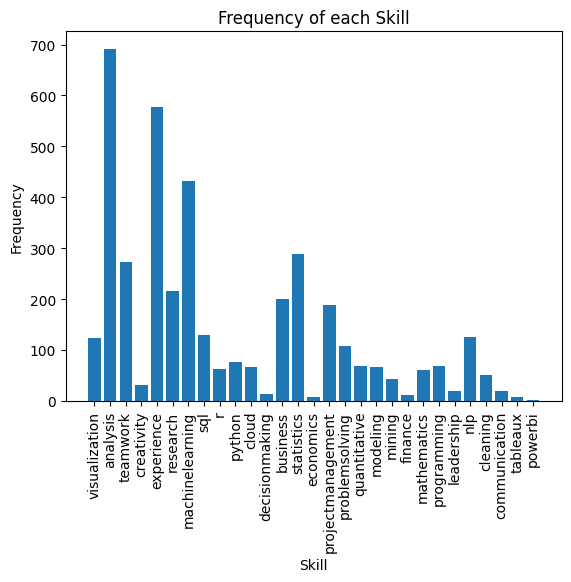

In [24]:
# Count the frequency of each skill
skill_counts = []
for skills in df['Skills']:
    for skill in skills:
        skill_counts.append(skill)

skill_counts= Counter(skill_counts)
# Create a bar chart of skill frequencies
plt.bar(skill_counts.keys(), skill_counts.values())
plt.title('Frequency of each Skill')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

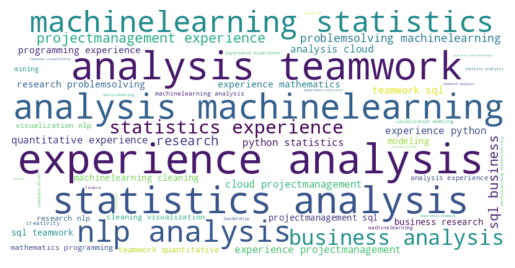

In [65]:
###########
from wordcloud import WordCloud
# Combine all skills into a single string
skills_combined = ' '.join([skill for skills in df['Skills'] for skill in skills])

# Generate word cloud from skills string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_combined)

# Display word cloud
plt.Figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **3. [3 pts] Hierarchical clustering implementation:**

In [26]:
#######
from sklearn.preprocessing import MultiLabelBinarizer
# create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df['Skills'])
vectorized_df = pd.DataFrame(X, columns=mlb.classes_)
vectorized_df


,analysis,business,cleaning,cloud,communication,creativity,decisionmaking,economics,experience,finance,...,projectmanagement,python,quantitative,r,research,sql,statistics,tableaux,teamwork,visualization
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1792,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1793,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1794,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
# Normalize
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import euclidean

vectorized_normal = normalize(vectorized_df,axis=1)
vectorized_normal_df = pd.DataFrame(vectorized_normal)
# Creat Proximity Matrix
D = np.zeros([vectorized_normal.shape[1],vectorized_normal.shape[1]])

for i in range(vectorized_normal.shape[1]):
    for j in range(vectorized_normal.shape[1]):
        D[i,j] = cosine(vectorized_normal_df.iloc[:,i], vectorized_normal_df.iloc[:,j])
        
# Hierarchical Clustering
Y = sch.linkage(D, method='ward')

# Get cluster labels for each data point
labels = sch.fcluster(Y, t=1.45*D.max(), criterion='distance')

# Add cluster labels to last row of DataFrame
vectorized_df.loc['cluster'] = labels


<ipython-input-27-b16400dfe006>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='ward')


In [28]:
pd.set_option('display.max_columns', 100)
vectorized_df.tail()

,analysis,business,cleaning,cloud,communication,creativity,decisionmaking,economics,experience,finance,leadership,machinelearning,mathematics,mining,modeling,nlp,powerbi,problemsolving,programming,projectmanagement,python,quantitative,r,research,sql,statistics,tableaux,teamwork,visualization
1792,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1794,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
cluster,4,11,2,5,9,9,8,9,5,9,8,2,3,7,7,2,6,9,3,5,1,10,1,10,11,4,6,4,2


[]

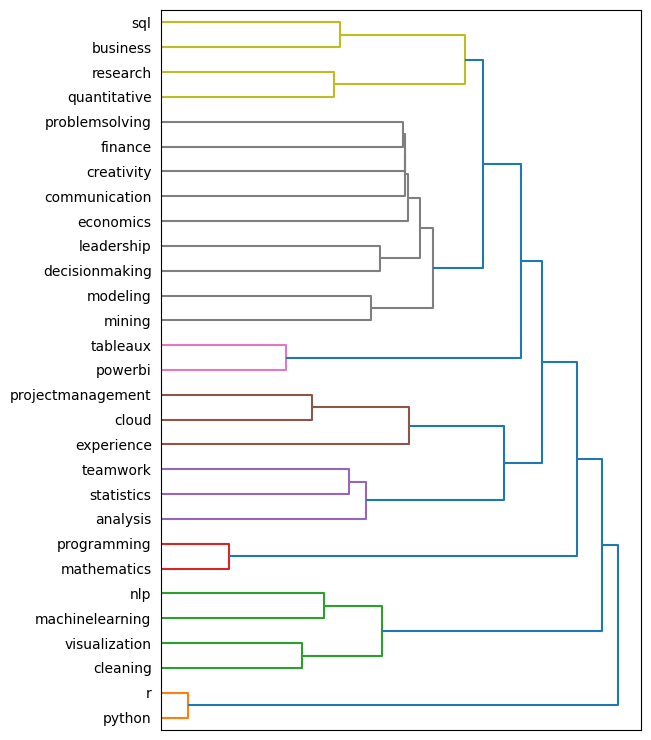

In [29]:
# Visualize Dendrograms
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get dendrograms
Z1 = sch.dendrogram(Y, orientation='right')
labels = vectorized_df.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.plot()

In [30]:
###########

* course 1: sql, business, research, quantitative: **"SQL for Business and Research Analysis"**
* course 2: problem solving, finance, communication: **"Strategies for Problem Solving and Communication in Finance"**
* course 3: economics, leadership, decision making: **"Leadership and Decision Making in Economic Environments"**
* course 4: tableau, power bi, creativity: **"Creative Data Visualization with Tableau and Power BI"**
* course 5: project management, cloud data, experience: **"Experience-Based Project Management in Cloud Data Environments"**
* course 6: team work, statistics, analysis: **"Real-World Data Analysis with Group Projects in Statistics"**
* course 7: programming, mathematics, natural language processing: **"Mathematical Programming and Natural Language Processing Techniques"** 
* course 8: machine learning, visualization, cleaning, r, python: **"Python and R for Machine Learning: Cleaning and Visualization Techniques"**

Using the clutering results above and some minor manual tweaks to fit at least 3 skills for at least 8 courses, the above is the resulting curriculum for courses to be offered for the new Master of Business and Management in Data Science and Artificial Intelligence program based on hierarchical clustering. The approach used was basically first to account for each cluster as a course, but then some clusters had less than 3 topics. So in order to accommodate for that, we looked at nearby clusters belonging to the same branch in order to combine skills in same courses while also keeping in mind the logic behind choosing. For example, it is better to squeeze creativity with tableau and power bi rather than research, etc.

## **4. [3 pts] K-means clustering implementation:**

## **Feature Engineering**

In [31]:
new_df = df.copy()

### **Feature 1: Skill Frequency**

In [32]:
skill_counts
skill_df = pd.DataFrame(list(skill_counts.items()), columns=['skill', 'count'])
skill_df=skill_df.sort_values('skill')
skill_df=skill_df.reset_index(drop=True)
skill_df

,skill,count
0,analysis,691
1,business,200
2,cleaning,52
3,cloud,67
4,communication,19
5,creativity,32
6,decisionmaking,13
7,economics,8
8,experience,578
9,finance,12


### **Feature 2: Average salary for skill** 

for this feature, first I removed the 'up to', 'from', '$', and commas from the salaries. Now we're left with salary ranges with some are hourly ('an hour'), some weekly ('a week'), and some yearly ('a year'). I made the function yearly_salary that checks which string is in the salary to know if it's hourly, weekly, or yearly. Then if the salary is just a number (not a range) we take that number as it is. If it's hourly we convert it to yearly assuming 40 hour weeks and 52 weeks a year. Similar process is done for the weekly rate. If we have ranges, I took the average of the range extremes as the singular value for the salary. I know this method isn't ideal and ranges can be very large at times but this was most appropriate for the time being.

In [34]:
# Remove 'Up to' and 'From' from salary range
new_df['Salary'] = new_df['Salary'].str.replace('Up to', '')
new_df['Salary'] = new_df['Salary'].str.replace('From', '')

# Remove $ sign
new_df['Salary'] = new_df['Salary'].str.replace('$', '')

# Remove commas from the salary column
new_df['Salary'] = new_df['Salary'].str.replace(',', '')

<ipython-input-34-ced1f2917b62>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Salary'] = new_df['Salary'].str.replace('$', '')


In [35]:
def yearly_salary(salary):
    if isinstance(salary, str):
        if "an hour" in salary:
            range_values = salary.replace(' an hour', '').split('-')
            if len(range_values) == 1:
                hourly_rate = float(range_values[0])
            else:
                hourly_low = float(range_values[0])
                hourly_high = float(range_values[1])
                hourly_rate = (hourly_low + hourly_high) / 2
            yearly_rate = hourly_rate * 40 * 52
        elif "a week" in salary:
            range_values = salary.replace(' a week', '').split('-')
            if len(range_values) == 1:
                weekly_rate = float(range_values[0])
            else:
                weekly_low = float(range_values[0])
                weekly_high = float(range_values[1])
                weekly_rate = (weekly_low + weekly_high) / 2
            yearly_rate = weekly_rate * 52
        elif "a year" in salary:
            range_values = salary.replace(' a year', '').replace(',', '').split('-')
            if len(range_values) == 1:
                yearly_rate = float(range_values[0])
            else:
                yearly_low = float(range_values[0])
                yearly_high = float(range_values[1])
                yearly_rate = (yearly_low + yearly_high) / 2
        else:
            yearly_rate = None
    else:
        yearly_rate = None
    
    return yearly_rate


new_df['Yearly_Salary'] = new_df['Salary'].apply(yearly_salary)

In [36]:
median_salary = new_df['Yearly_Salary'].median()
new_df['Yearly_Salary'] = new_df['Yearly_Salary'].fillna(median_salary)

In [37]:
# remove empty skill lists
new_df = new_df[new_df['Skills'].apply(len) > 0]

# explode the skills column
new_df_expanded = new_df.explode('Skills')

# group by skill and calculate the mean salary
average_salary_per_skill = new_df_expanded.groupby('Skills')['Yearly_Salary'].mean()

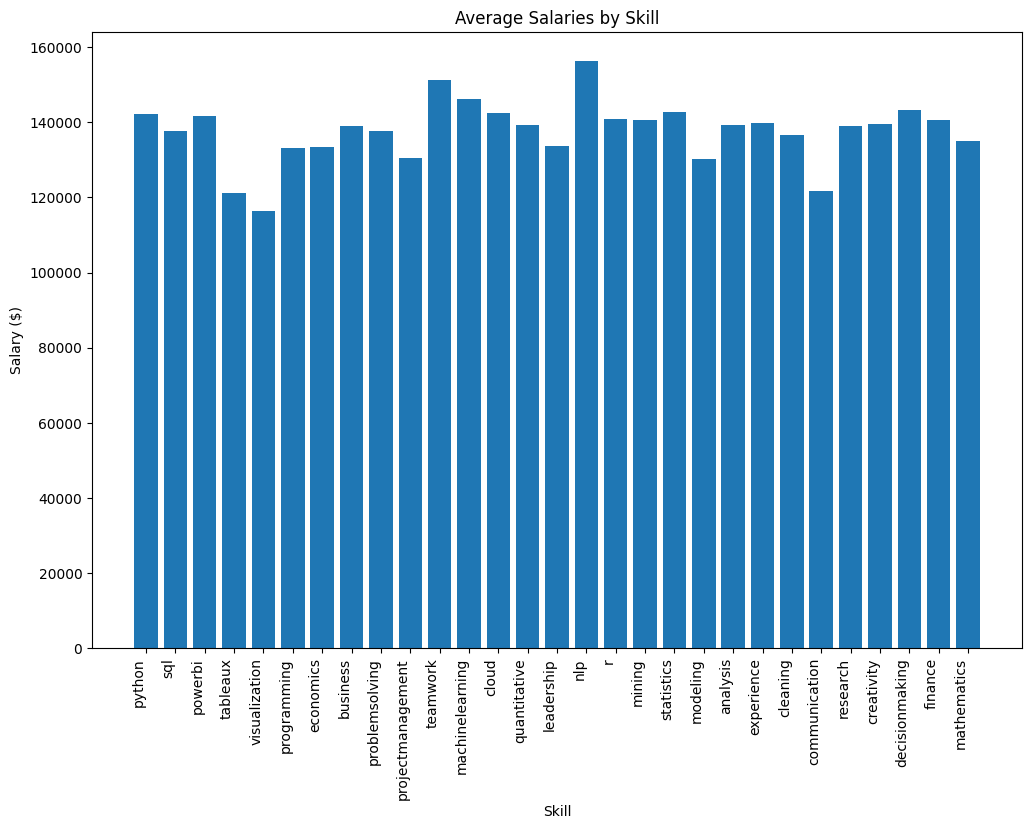

In [38]:
# Create the vertical bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(all_skills, average_salary_per_skill)

# Set the title and axis labels
ax.set_title('Average Salaries by Skill')
ax.set_xlabel('Skill')
ax.set_ylabel('Salary ($)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

In [39]:
average_salary_per_skill_df=pd.DataFrame({
    'salary':average_salary_per_skill.tolist()
})

skill_df['salary']=average_salary_per_skill_df['salary']

### **Feature 3: Binary indication of soft or hard skill**

In [41]:
hard_skills=['python', 'sql', 'tableaux' ,'powerbi', 'visualization', 'programming', 'economics', 'cloud','mathematics','quantitative',
             'business', 'r', 'mining', 'statistics', 'modeling', 'analysis', 'experience', 'cleaning', 'finance','machinelearning','nlp']
soft_skills=['problemsolving', 'projectmanagement', 'teamwork', 'communication', 'research', 'creativity', 'decisionmaking','leadership']

In [42]:
skill_type=[]
for skill in all_skills:
   if skill in hard_skills:
        skill_type.append(1)
   else:
        skill_type.append(0)
skill_type=pd.DataFrame({
    'soft/hard':skill_type})
skill_df=pd.concat([skill_df, skill_type], axis=1)

In [43]:
skill_df

,skill,count,salary,soft/hard
0,analysis,691,142311.946744,1
1,business,200,137759.692500,1
2,cleaning,52,141576.923077,1
3,cloud,67,121214.111940,1
4,communication,19,116305.710526,1
5,creativity,32,133136.859375,1
6,decisionmaking,13,133343.707692,1
7,economics,8,139123.125000,1
8,experience,578,137586.485640,0
9,finance,12,130426.958333,0


### **Feature 4: Job posting date per skill**
The average age of job postings that require the skill. This could give an indication of the current demand for the skill in the job market.

In [44]:
recent=['PostedJust posted','PostedToday','PostedPosted 2 days ago','PostedPosted 3 days ago','PostedPosted 4 days ago','PostedPosted 5 days ago','PostedPosted 6 days ago','PostedPosted 7 days ago',
        'EmployerActive 2 days ago','EmployerActive 3 days ago','EmployerActive 4 days ago','EmployerActive 5 days ago','EmployerActive 6 days ago','EmployerActive 7 days ago']
semi_recent=['PostedPosted 8 days ago','PostedPosted 9 days ago','PostedPosted 10 days ago','PostedPosted 11 days ago','PostedPosted 12 days ago','PostedPosted 13 days ago','PostedPosted 14 days ago',
             'EmployerActive 8 days ago', 'EmployerActive 9 days ago', 'EmployerActive 10 days ago', 'EmployerActive 11 days ago', 'EmployerActive 12 days ago', 'EmployerActive 13 days ago', 'EmployerActive 14 days ago']
old=['PostedPosted 15 days ago','PostedPosted 16 days ago','PostedPosted 17 days ago','PostedPosted 18 days ago','PostedPosted 19 days ago','PostedPosted 20 days ago','PostedPosted 21 days ago',
     'PostedPosted 22 days ago','PostedPosted 23 days ago','PostedPosted 24 days ago','PostedPosted 25 days ago','PostedPosted 26 days ago','PostedPosted 27 days ago',
     'PostedPosted 28 days ago','PostedPosted 29 days ago','PostedPosted 30+ days ago',
      'EmployerActive 15 days ago', 'EmployerActive 16 days ago', 'EmployerActive 17 days ago', 'EmployerActive 18 days ago', 'EmployerActive 19 days ago', 'EmployerActive 20 days ago',
      'EmployerActive 21 days ago', 'EmployerActive 22 days ago', 'EmployerActive 23 days ago']

# define a function to map the date categories to numerical values
def map_date_category_to_numeric(date_category):
    if date_category in recent:
        return 0
    elif date_category in semi_recent:
        return 1
    else:
        return 2

In [45]:
new_df['average_age'] = new_df['Date'].apply(lambda x: map_date_category_to_numeric(x))
new_df_expanded = new_df.explode('Skills')
average_age = new_df_expanded.groupby('Skills')['average_age'].mean()
avg_age_df=pd.DataFrame({
    'age':average_age.tolist()})
skill_df=pd.concat([skill_df, avg_age_df], axis=1)

### **Feature 5: Distance matrix**

In [ ]:
average_distances = np.mean(D, axis=1)
skill_df['average_distance'] = average_distances

### **Feature 6: Business oriented skills**

In [47]:
print(all_skills)

['python', 'sql', 'powerbi', 'tableaux', 'visualization', 'programming', 'economics', 'business', 'problemsolving', 'projectmanagement', 'teamwork', 'machinelearning', 'cloud', 'quantitative', 'leadership', 'nlp', 'r', 'mining', 'statistics', 'modeling', 'analysis', 'experience', 'cleaning', 'communication', 'research', 'creativity', 'decisionmaking', 'finance', 'mathematics']


In [48]:
business_skills=['economics','business','projectmanagement','finance','teamwork','decisionmaking','problemsolving']

In [49]:
business_values=[]
for skill in all_skills:
   if skill in business_skills:
        business_values.append(1)
   else:
        business_values.append(0)
business_df=pd.DataFrame({
    'business_oriented':business_values})
skill_df=pd.concat([skill_df, business_df], axis=1)

### **Feature 7: Programming oriented skills**

In [50]:
print(all_skills)

['python', 'sql', 'powerbi', 'tableaux', 'visualization', 'programming', 'economics', 'business', 'problemsolving', 'projectmanagement', 'teamwork', 'machinelearning', 'cloud', 'quantitative', 'leadership', 'nlp', 'r', 'mining', 'statistics', 'modeling', 'analysis', 'experience', 'cleaning', 'communication', 'research', 'creativity', 'decisionmaking', 'finance', 'mathematics']


In [51]:
prog_skills=['python','sql','r','programming','mining','modeling','analysis','cleaning','cloud','nlp','machinelearning']

In [52]:
prog_values=[]
for skill in all_skills:
   if skill in prog_skills:
        prog_values.append(1)
   else:
        prog_values.append(0)
prog_df=pd.DataFrame({
    'programming_oriented':prog_values})
skill_df=pd.concat([skill_df, prog_df], axis=1)

### **Feature 8: Visualization oriented skills**

In [53]:
viz_skills=['powerbi','tableaux','visualization','creativity']
viz_values=[]
for skill in all_skills:
   if skill in viz_skills:
        viz_values.append(1)
   else:
        viz_values.append(0)
viz_df=pd.DataFrame({
    'visual_oriented':viz_values})
skill_df=pd.concat([skill_df, viz_df], axis=1)

### **Feature 9: Average experience needed for skill**

for this feature, I set the search for experience, year, and years in the job descriptions for each row. I set it binary, 1 if experience is mentioned and 0 if not. Thus, the closer the value to 1, the more experience is valued for this skill.

In [54]:
experience_required = ['experience', 'year', 'years']

# create a function to check if a string contains any of the words in the list
def experience_check(text):
    for word in experience_required:
        if word in text:
            return 1
    return 0

# create a new column that contains a binary indicator variable based on the 'Description_modified' column
new_df_expanded = new_df.explode('Skills')
new_df['experience_required'] = new_df['Description_modified'].apply(lambda x: experience_check(x))

In [55]:
new_df_expanded = new_df.explode('Skills')
average_experience_per_skill = new_df_expanded.groupby('Skills')['experience_required'].mean()

In [56]:
avg_exp=pd.DataFrame({
    'experience':average_experience_per_skill.tolist()})
skill_df=pd.concat([skill_df, avg_exp], axis=1)

### **Feature 10: Average education required**

Similar procedure to feature 9

In [57]:
education_required = ['engineering', 'masters', 'degree','education']

# create a function to check if a string contains any of the words in the list
def education_check(text):
    for word in education_required:
        if word in text:
            return 1
    return 0

# create a new column that contains a binary indicator variable based on the 'Description_modified' column
new_df_expanded = new_df.explode('Skills')
new_df['education_required'] = new_df['Description_modified'].apply(lambda x: education_check(x))

In [58]:
new_df_expanded = new_df.explode('Skills')
average_education_per_skill = new_df_expanded.groupby('Skills')['education_required'].mean()

In [59]:
avg_edu=pd.DataFrame({
    'education':average_education_per_skill.tolist()})
skill_df=pd.concat([skill_df, avg_edu], axis=1)

In [ ]:
skill_df = skill_df.set_index('skill')

### **Implementing KMeans:**

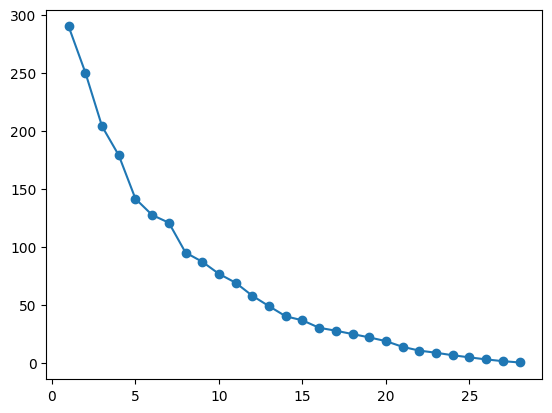

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Elbow method to find optimal number of clusters
# instantiate a StandardScaler object
scaler = StandardScaler()
# fit the scaler to your data and transform your data
scaled_data = scaler.fit_transform(skill_df)

inertia_list = []

for i in range(1,29):
    kmeans = KMeans(n_clusters=i,n_init='auto',random_state=0)
    kmeans.fit(scaled_data)
    inertia_list.append(kmeans.inertia_)
plt.plot(range(1,29), inertia_list, marker='o')
plt.show()

we can see that the point of diminishing returns is midway between 10 and 15, I will choose 13.

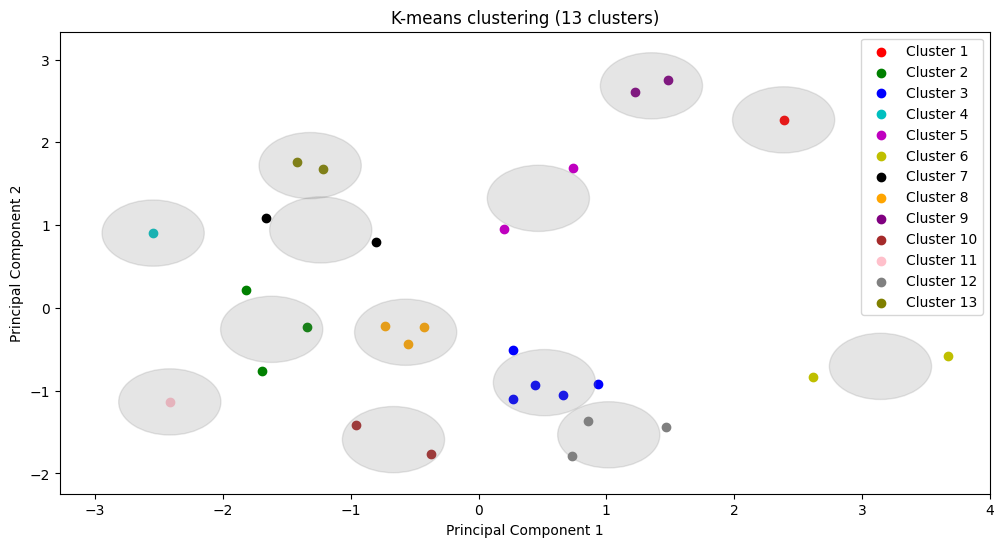

In [62]:
from sklearn.decomposition import PCA
# run PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

# run K-means clustering with 13 clusters on the reduced data
kmeans = KMeans(n_clusters=13, n_init='auto', random_state=0)
kmeans.fit(components)

# get the cluster assignments for each data point
labels = kmeans.labels_

# get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# create a scatter plot of the data, colored by cluster assignment
plt.figure(figsize=(12,6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
for i in range(13):
    plt.scatter(components[labels==i, 0], components[labels==i, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clustering (13 clusters)')

# add legend
plt.legend()

# add circles around cluster centers
centers = kmeans.cluster_centers_
for i in range(13):
    circle = plt.Circle((centers[i,0], centers[i,1]), radius=0.4, alpha=0.2, color='gray')
    plt.gca().add_patch(circle)

plt.show()

In [63]:
skill_df['cluster_label'] = labels + 1

In [64]:
skill_df

,count,salary,soft/hard,age,average_distance,business_oriented,programming_oriented,visual_oriented,experience,education,cluster_label
skill,,,,,,,,,,,
analysis,691,142311.946744,1,1.487699,0.862841,0,1,0,0.282200,0.036179,6
business,200,137759.692500,1,1.860000,0.922737,0,1,0,0.080000,0.005000,12
cleaning,52,141576.923077,1,1.961538,0.918455,0,0,1,0.019231,0.000000,10
cloud,67,121214.111940,1,1.970149,0.935261,0,0,1,0.880597,0.074627,2
communication,19,116305.710526,1,1.263158,0.954948,0,0,1,0.210526,0.052632,11
creativity,32,133136.859375,1,1.531250,0.953404,0,1,0,0.031250,0.062500,10
decisionmaking,13,133343.707692,1,1.461538,0.953645,1,0,0,0.153846,0.076923,2
economics,8,139123.125000,1,1.875000,0.952714,1,0,0,0.500000,0.750000,13
experience,578,137586.485640,0,1.591696,0.863816,1,0,0,1.000000,0.126298,9


* cluster 1: mathematics
* cluster 2: research, decision making, cloud
* cluster 3: problem solving, r, visualization, power bi
* cluster 4: tableau, modeling, leadership, finance, economics
* cluster 5: statistics
* cluster 6: analysis
* cluster 7: python, project management, business, nlp
* cluster 8: programming, experience
* cluster 9: creativity, cleaning
* cluster 10: communication
* cluster 11: machine learning
* cluster 12: team work
* cluster 13: sql, quantitative, mining

* course 1: programming, experience, mathematics: **"Applied Mathematics for Programming: Real-World Examples and Experience"**
* course 2: analysis, machine learning, nlp: **"Data Analysis and Machine Learning for NLP Applications"**
* course 3: python, project management, business: **"Python for Business Project Management"**
* course 4: research, decision making, cloud data: **"Cloud Data for Research and Decision Making"**
* course 5: sql, quantitative, mining: **"Data Mining Techniques with SQL for Quantitative Analysis"**
* course 6: leadership, finance, economics: **"Leadership in Finance and Economics"**
* course 7: tableau, modeling, team work: **"Tableau Modeling and Visualization: Group Project based Course**
* course 8: creativity, cleaning, communication: **"Innovative Approaches to Data Cleaning and Communication"**

## **6. [2 pts] Discussion and final course curriculum:**

There are some similarities and differences between the two course curriculums generated by hierarchical and k-means clustering. Let's explore these below:

Similarities:

Both course curriculums cover programming, machine learning, leadership, finance, economics, and project management.
Both curriculums include courses related to data visualization using tools such as Tableau and Power BI.
Both curriculums have courses that focus on teamwork and communication skills.
Both curriculums have courses that use real-world examples and experience-based learning.

Differences:

The hierarchical clustering generated curriculum covers more diverse topics, including natural language processing and statistics, whereas the k-means curriculum focuses more on programming and applied mathematics.
The hierarchical clustering curriculum includes courses related to research, decision making, and cloud data, which are not covered in the k-means curriculum.
The k-means curriculum includes a course on innovative approaches to data cleaning and communication, which is not covered in the hierarchical clustering curriculum.
Overall, the hierarchical clustering curriculum seems to be more balanced in terms of covering a wider range of skills and topics. The curriculum seems to have logically grouped courses that have more similar skills such as Tableau, Power BI, and creativity in one course. This could help students understand and integrate these skills more effectively. In contrast, the k-means curriculum seems to have more small clusters, even after applying elbow method and finding optimal number of clusters.

In conclusion the hierarchical clustering curriculum seems to be more appealing because it provides a more balanced and diverse set of skills while also effectively grouping related topics together so that will be my curriculum of choosing.

## **7. [+1 bonus pt] OpenAI to describe clustering results:**

Hierarchical Clustering:
The hierarchical clustering algorithm has generated 11 clusters, each representing a set of related skills or concepts. The clusters vary in their size and granularity, with some representing broader themes and others representing more specific topics. For example, Cluster 1 represents programming languages (R and Python), while Cluster 4 represents more general skills like analysis, statistics, and teamwork. Cluster 9 represents a diverse set of skills related to communication, economics, finance, problem-solving, and creativity.

One benefit of hierarchical clustering is that it generates a dendrogram that can provide insights into the relationships between the clusters. For example, we can see that Cluster 2 (data cleaning, machine learning, NLP, visualization) and Cluster 7 (data mining, modeling) are closely related, as they both deal with data analysis and manipulation. In contrast, Cluster 5 (cloud data, experience, project management) is more distinct from the other clusters, indicating that it represents a separate set of skills or experiences.

K-means Clustering:
The k-means algorithm has generated 13 clusters, each representing a specific set of skills or concepts. The clusters vary in their size and focus, with some representing broader themes and others representing more specific topics. For example, Cluster 1 represents mathematics, while Cluster 11 represents machine learning.

One benefit of k-means clustering is that it allows us to specify the number of clusters we want, which can be useful in cases where we have a priori knowledge about the number of distinct groups in the data. In this case, the algorithm has generated 13 clusters, which may be more appropriate for certain tasks than the 11 clusters generated by the hierarchical algorithm.

Another benefit of k-means clustering is that it can be more efficient than hierarchical clustering, especially when dealing with large datasets. However, it does not provide the same visual insights into the relationships between the clusters as hierarchical clustering.

Overall, the choice of clustering algorithm will depend on the specific goals and requirements of the task at hand, as well as the characteristics of the dataset being analyzed. Both hierarchical and k-means clustering have their strengths and weaknesses, and researchers must choose the one that best meets their needs.